In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
from fxcmtoken import major_forex_pairs
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (14,6)

In [2]:
path = 'log_files'
portfolio = pd.DataFrame()
for i in range(1, 32):
    if i < 10:
        file_name = f'2022_02_0{i}_PortfolioLog.csv'
    else:
        file_name = f'2022_02_{i}_PortfolioLog.csv'
    file_path = os.path.join(path, file_name)
    if os.path.exists(file_path):
        data = pd.read_csv(file_path, parse_dates=['date'], index_col=['date'])
        if portfolio.empty:
            portfolio = data
        else:
            portfolio = pd.concat([portfolio, data])
portfolio['return'] = np.log(portfolio['equity']/ portfolio['equity'].shift(1))
display(portfolio.head())
display(portfolio.tail())
print(portfolio.shape)

,balance,equity,dayPL,usdMr,usableMargin,return
date,,,,,,
2022-02-03 08:46:33.376687+00:00,18618.35,18618.35000,-0.79000,0.00,18618.35000,NaN
2022-02-03 08:50:54.744695+00:00,18618.35,18618.35000,-0.79000,0.00,18618.35000,0.000000
2022-02-03 09:00:09.010237+00:00,18618.35,18618.35000,-0.79000,0.00,18618.35000,0.000000
2022-02-03 09:10:02.164316+00:00,18618.35,18604.64757,-14.49243,117.25,18487.39757,-0.000736
2022-02-03 09:20:02.529124+00:00,18618.35,18604.38265,-14.75735,117.25,18487.13265,-0.000014


,balance,equity,dayPL,usdMr,usableMargin,return
date,,,,,,
2022-02-11 20:30:37.845535+00:00,18424.71,18381.24833,-184.40167,117.25,18263.99833,-0.000186
2022-02-11 20:40:03.528680+00:00,18387.64,18379.26656,-186.38344,117.25,18262.01656,-0.000108
2022-02-11 20:45:35.646143+00:00,18387.64,18377.42292,-188.22708,117.25,18260.17292,-0.000100
2022-02-11 20:55:39.691074+00:00,18387.64,18375.48230,-190.16770,117.25,18258.23230,-0.000106
2022-02-11 21:10:17.585611+00:00,18374.60,18374.60000,-191.05000,0.00,18374.60000,-0.000048


(737, 6)


In [3]:
print(f"Start date: {portfolio.index[0]}")
print(f"End date: {portfolio.index[-1]}")
print(f"Length: {portfolio.index[-1] - portfolio.index[0]}")
print(f"Total return: {portfolio['return'].cumsum()[-1] * 100:.2f} %")

Start date: 2022-02-03 08:46:33.376687+00:00
End date: 2022-02-11 21:10:17.585611+00:00
Length: 8 days 12:23:44.208924
Total return: -1.32 %


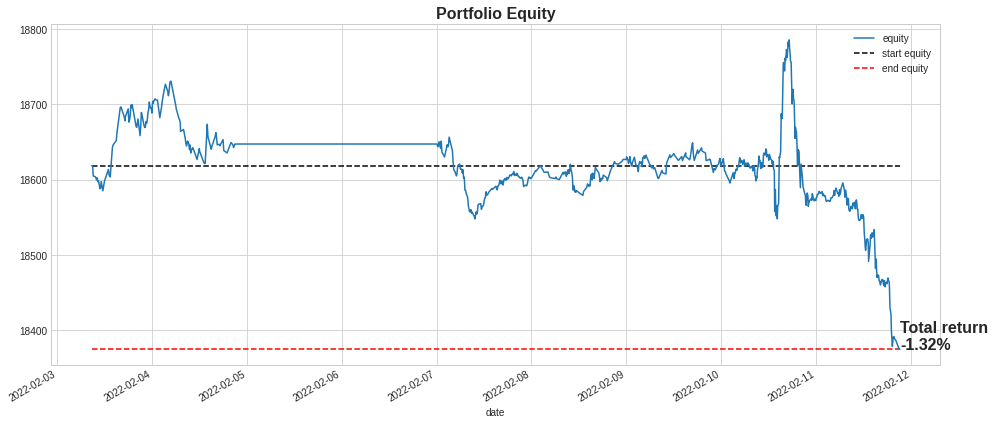

In [4]:
portfolio[['equity']].plot()
plt.hlines(portfolio['equity'][0], xmin=portfolio.index[0], xmax=portfolio.index[-1], color='k', linestyle='--', label='start equity')
plt.hlines(portfolio['equity'][-1], xmin=portfolio.index[0], xmax=portfolio.index[-1], color='r', linestyle='--', label='end equity')
plt.text(x=portfolio.index[-1], y=portfolio['equity'][-1], s=f"Total return\n{portfolio['return'].cumsum()[-1] * 100:.2f}%", fontsize=16, fontweight='bold')
plt.title("Portfolio Equity", fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

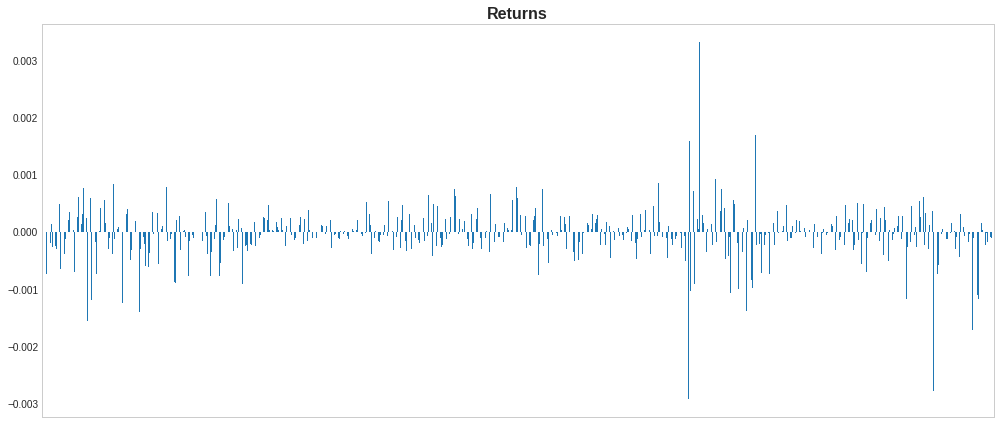

In [5]:
portfolio['return'].plot(kind='bar', use_index=False, grid=False, xticks=[])
plt.title("Returns", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

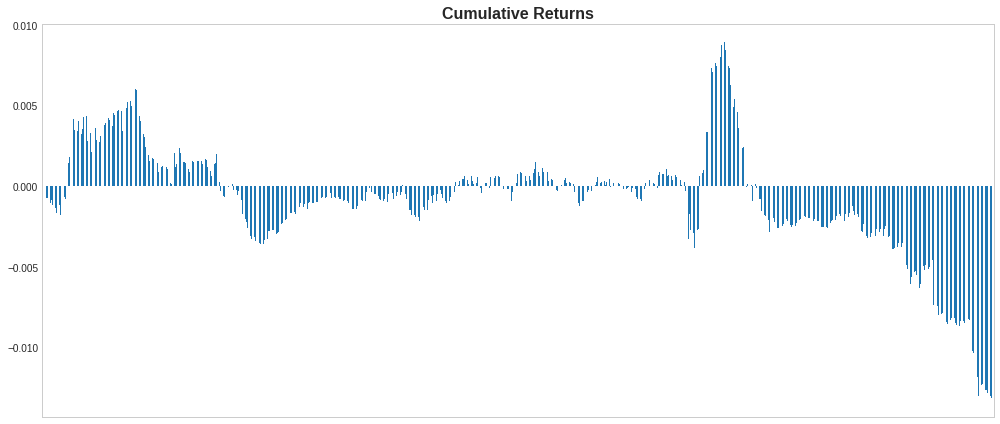

In [6]:
portfolio['return'].cumsum().plot(kind='bar', use_index=False, grid=False, xticks=[])
plt.title("Cumulative Returns", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()